In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import beta


# First taste of posterior probabilities

## Context:
Imagine a 4 sided globe where you toss and try to figure out what proportion of the globe is made of water (p). W is the number of Water observations, and L is the number of Land observations.

In [2]:
sample = [
    "W",
    "L",
    "W",
    "W",
    "W",
    "L",
    "W",
    "L",
    "W"
]

In [3]:
len(sample)

9

In [4]:
sum_w = len(list(filter(lambda x: x == "W", sample)))
sum_w

6

In [5]:
sum_l = len(list(filter(lambda x: x == "L", sample)))
sum_l

3

In [6]:
p_list = [0, 0.25, 0.5, 0.75, 1]

In [7]:
def relative_num_ways( p:float, w:int, l:int):
    """
    General formula to calculate the number of ways of observing Water (target variable)

    p is the proportion of water on the 4 sided globe
    w is the number of water observations
    l is the number of land observations
    
    """
    return ((4 * p) ** w) * ((4- 4 * p) ** l)

In [8]:
relative_num_ways(0.75, sum_w, sum_l)

729.0

In [9]:
relative_num_ways(1, 2, 8)

0

In [10]:
posterior_out = {}

for p in p_list:
    posterior = relative_num_ways(p, sum_w, sum_l)
    posterior_out[p] = posterior




In [11]:
posterior_out

{0: 0, 0.25: 27.0, 0.5: 512.0, 0.75: 729.0, 1: 0}

In [12]:
729/1268

0.5749211356466877

In [13]:
# Convert number of possible outcomes to probabilities
total_num_outcomes = sum(posterior_out.values())
for p, v in posterior_out.items():
    posterior_out[p] = v / total_num_outcomes


In [14]:
posterior_out.values()

dict_values([0.0, 0.021293375394321766, 0.4037854889589905, 0.5749211356466877, 0.0])

In [15]:
sum(posterior_out.values())

1.0

Text(0, 0.5, 'Posterior Probabilities')

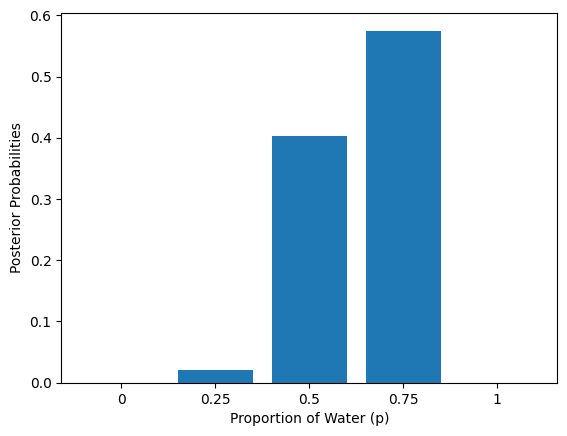

In [16]:
plt.bar(range(len(posterior_out)), posterior_out.values(), align='center')
plt.xticks(range(len(posterior_out)), posterior_out.keys())
plt.xlabel("Proportion of Water (p)")
plt.ylabel("Posterior Probabilities")

In [17]:
# Validate that sum of all posterior probabilities is 1

sum(posterior_out.values())

1.0

# Implement Generative Model

In [18]:
def globe_sampling(p, N=10):
    """
    Simulate N tosses of the 4 sided globe
    """
    return np.random.choice(a = ["W", "L"], size=int(N), p=[p, 1-p])


In [19]:
globe_sampling(0.5, 10)

array(['L', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'W', 'W'], dtype='<U1')

## How to test generative model?

### Test extreme settings (p=1, p=0)

In [20]:
# Test p=0
globe_sampling(0, 10)

array(['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L'], dtype='<U1')

In [21]:

globe_sampling(1, 10)

array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'], dtype='<U1')

## Test that large samples converge to the p value

In [22]:
len(list(filter(lambda x: x == "W", sample)))

6

In [23]:
len(list(filter(lambda x: x == "W",globe_sampling(p=0.5, N=1e4)))) / 1e4

0.4935

# Sampling from the Posterior Distribution

## Why is the posterior distribution of infinite N experiments == Beta Distribution?

https://www.youtube.com/watch?v=juF3r12nM5A 

In [24]:
import seaborn as sns

# Detour: Demonstrating that as more samples are added with the same ratio of a:b, the Beta distribution narrows. 
This represents a decrease in uncertainty

(array([3.16070971, 0.        , 0.        , 6.32141942, 4.74106457,
        1.58035486]),
 array([0.48617984, 0.54945677, 0.6127337 , 0.67601063, 0.73928756,
        0.80256448, 0.86584141]),
 <BarContainer object of 6 artists>)

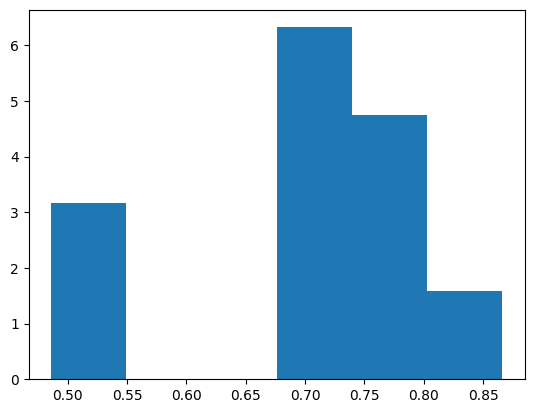

In [25]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 7+1, b = 3+1, size = 10), density = True, bins = "auto") # the underlying implication is that probability of a is always a/(a+b)

(array([ 0.87516954,  0.        ,  0.43758477,  3.50067817,  6.12618679,
         6.56377156, 10.5020345 ,  8.31411065,  7.00135634,  0.43758477]),
 array([0.55467918, 0.5775319 , 0.60038461, 0.62323733, 0.64609004,
        0.66894276, 0.69179547, 0.71464819, 0.7375009 , 0.76035362,
        0.78320633]),
 <BarContainer object of 10 artists>)

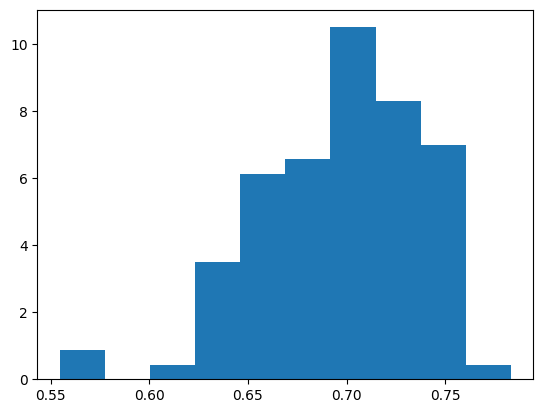

In [26]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 70+1, b = 30+1, size = 100), density = True, bins = "auto")


(array([ 0.81721331,  1.90683106,  2.1792355 ,  3.81366212,  4.08606655,
         5.99289761,  9.53415529,  9.53415529, 15.25464847, 20.15792834,
        24.51639933, 25.87842151, 26.96803926, 28.60246588, 25.87842151,
        22.60956827, 13.62022185, 10.62377304,  8.17213311,  5.1756843 ,
         3.81366212,  1.63442662,  0.81721331,  0.54480887,  0.        ,
         0.27240444]),
 array([0.65423424, 0.65790525, 0.66157627, 0.66524728, 0.66891829,
        0.6725893 , 0.67626031, 0.67993133, 0.68360234, 0.68727335,
        0.69094436, 0.69461538, 0.69828639, 0.7019574 , 0.70562841,
        0.70929942, 0.71297044, 0.71664145, 0.72031246, 0.72398347,
        0.72765448, 0.7313255 , 0.73499651, 0.73866752, 0.74233853,
        0.74600955, 0.74968056]),
 <BarContainer object of 26 artists>)

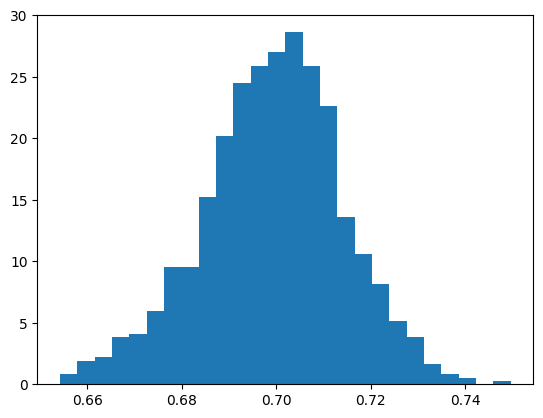

In [27]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 700+1, b = 300+1, size = 1000), density = True, bins = "auto")

(array([ 0.20200077,  0.20200077,  0.        ,  0.20200077,  0.80800306,
         0.40400153,  1.21200459,  1.81800689,  2.02000765,  5.25201989,
         3.83801454,  6.46402448,  8.88803366, 11.51404361, 16.36206197,
        21.81608262, 24.64409333, 34.13812929, 31.31011858, 37.77414306,
        46.66217672, 55.14620885, 59.79222645, 61.40823257, 63.42824022,
        63.42824022, 60.80223027, 56.76221497, 56.56021421, 48.68218437,
        48.07618208, 37.16814077, 30.30011475, 27.06810251, 22.01808339,
        15.35205814, 13.73605202,  8.6860329 ,  7.07002678,  5.65602142,
         3.43401301,  3.83801454,  2.62600995,  1.21200459,  0.80800306,
         0.80800306,  0.6060023 ]),
 array([0.67511795, 0.67610805, 0.67709814, 0.67808824, 0.67907833,
        0.68006843, 0.68105852, 0.68204862, 0.68303871, 0.68402881,
        0.68501891, 0.686009  , 0.6869991 , 0.68798919, 0.68897929,
        0.68996938, 0.69095948, 0.69194957, 0.69293967, 0.69392976,
        0.69491986, 0.69590995, 0.6

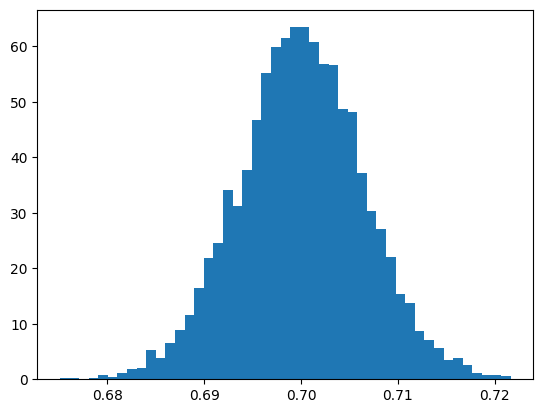

In [28]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 3500+1, b = 1500+1, size = 5000), density = True, bins = "auto")

## Detour: Thompson Sampling
https://www.youtube.com/watch?v=nkyDGGQ5h60

## Sampling from the beta distribution (posterior distribution)

In [57]:
from scipy.stats import beta

random_sample = beta.rvs(a = 6+1, b = 3+1, size = 1000)

# +1 is needed for a and b because the underlying formula uses (a-1) and (b-1)

In [58]:
random_sample

array([0.63351299, 0.2919427 , 0.55359289, 0.50912749, 0.75334526,
       0.36319093, 0.60552192, 0.50011034, 0.61257466, 0.73985477,
       0.58168803, 0.45987955, 0.73942516, 0.57230831, 0.64658766,
       0.55448096, 0.75899715, 0.74885636, 0.64792475, 0.67941643,
       0.60559569, 0.4479498 , 0.68560383, 0.48086465, 0.57775745,
       0.63359762, 0.66976533, 0.81984507, 0.50352873, 0.68783495,
       0.73467083, 0.62445274, 0.61572017, 0.7657991 , 0.66346821,
       0.5905112 , 0.68541169, 0.51648931, 0.80210739, 0.62269268,
       0.58945612, 0.72691936, 0.62731218, 0.50861879, 0.6564812 ,
       0.38824054, 0.73867643, 0.54706152, 0.60483137, 0.36083292,
       0.67442299, 0.46333027, 0.6505514 , 0.63145049, 0.37575488,
       0.4150578 , 0.55545055, 0.44191757, 0.60247728, 0.67563612,
       0.38719089, 0.52195482, 0.85294315, 0.56145481, 0.77386747,
       0.71864097, 0.32980737, 0.65559073, 0.65176045, 0.66421435,
       0.45707596, 0.29424765, 0.47980633, 0.64371634, 0.56002

(array([0.02562627, 0.05125254, 0.        , 0.15375762, 0.46127285,
        0.48689912, 0.94817196, 1.40944481, 2.15260662, 2.05010154,
        2.07572781, 2.5882532 , 2.43449558, 3.12640485, 2.40886931,
        2.10135408, 1.40944481, 0.92254569, 0.64065673, 0.17938388]),
 array([0.16799195, 0.2070144 , 0.24603686, 0.28505932, 0.32408178,
        0.36310423, 0.40212669, 0.44114915, 0.4801716 , 0.51919406,
        0.55821652, 0.59723898, 0.63626143, 0.67528389, 0.71430635,
        0.75332881, 0.79235126, 0.83137372, 0.87039618, 0.90941864,
        0.94844109]),
 <BarContainer object of 20 artists>)

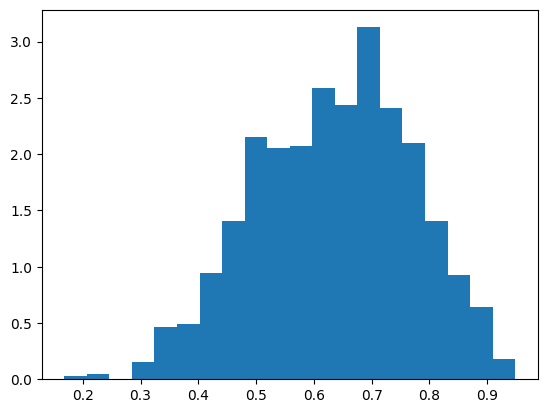

In [59]:
fig, ax = plt.subplots (1,1)

ax.hist(beta.rvs(a = 6+1, b = 3+1, size = 1000), density = True, bins = "auto")

## Deriving the Posterior Predictive Distribution

## Predictive Distribution for a given p (assuming 9 tosses per experiment)

([<matplotlib.axis.XTick at 0x1a55ed00550>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

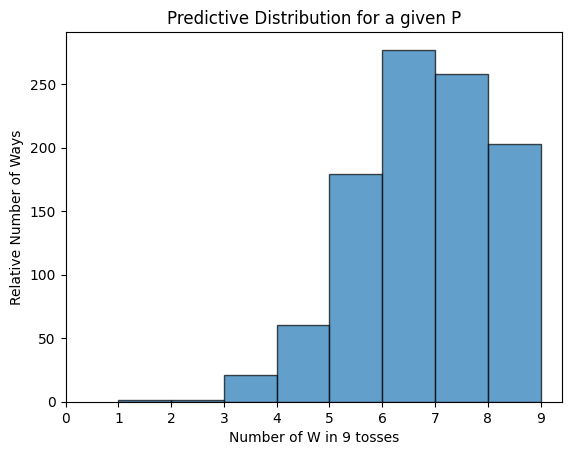

In [75]:
# Predictive distribution for a FIXED p = 0.7
p_fixed = 0.7
predictive_samples = []
for _ in range(1000):
    experiment = globe_sampling(p_fixed, N=9)
    predictive_samples.append(sum(x == "W" for x in experiment))

# Visualize the predictive distribution for a given p
plt.hist(predictive_samples, bins="auto", alpha=0.7, edgecolor='black')
plt.xlabel("Number of W in 9 tosses")
plt.ylabel("Relative Number of Ways")
plt.title("Predictive Distribution for a given P")
plt.xticks(range(10))

## Posterior Distribution for all values of P sampled from posterior distribution

([<matplotlib.axis.XTick at 0x1a55ed53390>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

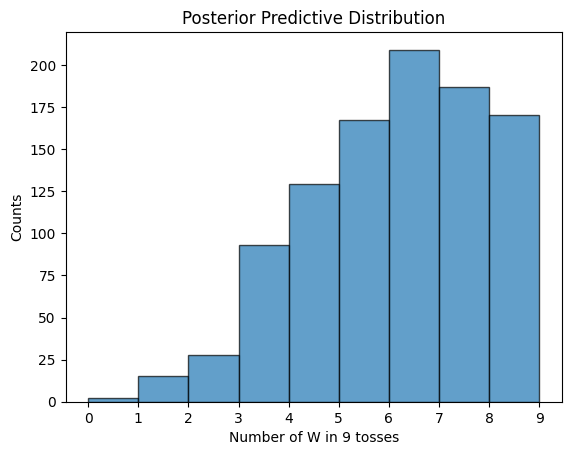

In [76]:
# Posterior Predictive Distribution: count W in each simulated experiment
w_counts = []  # Store number of W's from each experiment
all_experiments = []  # Store all experiments

for p in random_sample:
    sampling_experiments = globe_sampling(p, N=9)
    num_w = len(list(filter(lambda x: x == "W", sampling_experiments)))
    w_counts.append(num_w)  # Accumulate the counts
    all_experiments.append(sampling_experiments)  # Store all experiments for intuition later

# Visualize the posterior predictive distribution
plt.hist(w_counts, bins="auto", alpha=0.7, edgecolor='black')
plt.xlabel("Number of W in 9 tosses")
plt.ylabel("Counts")
plt.title("Posterior Predictive Distribution")
plt.xticks(range(10))


In [68]:
all_experiments

[array(['W', 'W', 'W', 'L', 'W', 'L', 'L', 'W', 'W', 'W', 'W'], dtype='<U1'),
 array(['L', 'W', 'L', 'L', 'W', 'W', 'W', 'L', 'L', 'W', 'L'], dtype='<U1'),
 array(['W', 'W', 'L', 'W', 'L', 'L', 'W', 'W', 'W', 'W', 'W'], dtype='<U1'),
 array(['L', 'L', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'W', 'L'], dtype='<U1'),
 array(['W', 'W', 'L', 'W', 'L', 'W', 'W', 'L', 'W', 'W', 'W'], dtype='<U1'),
 array(['L', 'L', 'L', 'L', 'W', 'W', 'L', 'L', 'W', 'W', 'L'], dtype='<U1'),
 array(['W', 'W', 'L', 'L', 'L', 'L', 'L', 'L', 'W', 'W', 'W'], dtype='<U1'),
 array(['W', 'L', 'L', 'W', 'W', 'L', 'L', 'L', 'W', 'L', 'W'], dtype='<U1'),
 array(['L', 'W', 'L', 'W', 'W', 'L', 'L', 'L', 'L', 'W', 'L'], dtype='<U1'),
 array(['W', 'W', 'L', 'W', 'W', 'W', 'L', 'L', 'W', 'L', 'W'], dtype='<U1'),
 array(['W', 'L', 'W', 'W', 'W', 'W', 'W', 'L', 'L', 'W', 'L'], dtype='<U1'),
 array(['L', 'L', 'W', 'L', 'L', 'L', 'L', 'L', 'W', 'L', 'L'], dtype='<U1'),
 array(['W', 'W', 'W', 'W', 'L', 'L', 'W', 'W', 'W', 'W', 'L'], 

# Modelling Measurement Error

In [88]:
def globe_sampling_measurement_error(p, N=10, error_rate=0.1):
    """
    Simulate N tosses of the 4 sided globe with measurement error
    error_rate is the probability that the observed outcome is flipped (W becomes L and vice versa)
    """
    true_outcomes = np.random.choice(a=["W", "L"], size=int(N), p=[p, 1-p])
    observed_outcomes = []
    
    for outcome in true_outcomes:
        if np.random.rand() < error_rate:  # Flip the outcome with probability equal to error_rate
            observed_outcomes.append("L" if outcome == "W" else "W")
        else:
            observed_outcomes.append(outcome)
    
    return observed_outcomes

In [89]:
globe_sampling_measurement_error(0.7)

[np.str_('W'),
 np.str_('W'),
 np.str_('W'),
 np.str_('L'),
 np.str_('L'),
 np.str_('W'),
 np.str_('L'),
 'L',
 np.str_('W'),
 np.str_('W')]